In [1]:
# Até a célula 24 são apenas as preparações de dados que fizemos até a entrega 2, depois disso que serão aplicadas as novas métricas.

# Além disso, tem apenas um incremento sobre o que foi pedido no dia da reunião. Os dados de cada estado foram coletados de tabelas .xlsx. Esses dados estavam em tabelas com múltiplas abas, onde apenas duas nos interessavam no momento. Sendo assim, a partir dessas duas abas, fizemos o download no formato CSV e a partir daí copiamos (na mão) apenas as linhas e colunas que nos interessavam para um novo arquivo CSV, nosso dataset "final", usado no trabalho.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.float_format = "{:.2f}".format
pd.options.display.max_rows = 10

In [3]:
def converter_dados_numericos_notacao_brasileira_para_float(value):
    if(value == '-'):
        return -1
    resultado = value.replace(" ", "")
    resultado = resultado.replace(".", "")
    resultado = resultado.replace(",", ".")
    return resultado

In [4]:
estado = "MG"

In [5]:
nome_arquivo_alimentacao = "../dados-limpos/aquisicao_por_classe_de_rendimento_e_estado/%s/dados-limpos/%s_alimentacao.csv" % (estado, estado)

In [6]:
dados_alimentacao_estado = pd.read_csv(nome_arquivo_alimentacao, index_col=False, squeeze=True)

#Remove colunas unamed
dados_alimentacao_estado = dados_alimentacao_estado.dropna(how='all', axis='columns')

In [7]:
dados_alimentacao_estado.columns

Index(['Tipos de despesa, número e tamanho médio das famílias',
       ' "Despesa monetária e não monetária média mensal familiar (R$)"',
       ' "Total"', ' "Até 1908 (2)"', 'Mais de 1908 a 2862',
       'Mais de 2862 a 5724', 'Mais de 5724 a 9540', 'Mais de 9540 a 14310',
       'Mais de 14310 a 23850'],
      dtype='object')

In [8]:
# Removendo aspas duplas e espaços em branco nos nomes das colunas

dados_alimentacao_estado.columns = dados_alimentacao_estado.columns.str.replace('"', '')
dados_alimentacao_estado.columns = dados_alimentacao_estado.columns.str.strip()

In [9]:
dados_alimentacao_estado.columns

Index(['Tipos de despesa, número e tamanho médio das famílias',
       'Despesa monetária e não monetária média mensal familiar (R$)', 'Total',
       'Até 1908 (2)', 'Mais de 1908 a 2862', 'Mais de 2862 a 5724',
       'Mais de 5724 a 9540', 'Mais de 9540 a 14310', 'Mais de 14310 a 23850'],
      dtype='object')

In [10]:
dados_alimentacao_estado

,"Tipos de despesa, número e tamanho médio das famílias",Despesa monetária e não monetária média mensal familiar (R$),Total,Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Despesas com alimentação,"688,51","327,38","470,26","682,91","965,76","1183,04","1511,11","2111,32"
1,Alimentação no domicílio,"421,18","233,71","310,48","432,82","562,13","664,21","784,44","1013,62"
2,"Cereais, leguminosas e oleaginosas","22,81","21,01","20,50","23,90","22,86","22,67","33,65","30,67"
3,Arroz,"14,25","13,81","13,31","15,60","13,85","12,66","14,22","12,00"
4,Feijão,"5,56","5,67","5,60","5,81","5,13","5,31","3,99","6,16"
...,...,...,...,...,...,...,...,...,...
81,"Cervejas, chopes e outras bebidas alcoólicas","8,98","3,63","6,21","9,63","15,13","14,46","9,64","16,72"
82,Alimentação light e diet,"0,09","0,11","0,05","0,09","0,15","0,00",-,"0,51"
83,Outras,"47,94","29,26","48,33","51,90","67,03","38,61","47,58","35,43"
84,Número de famílias,7149295,1392069,1478894,2470800,1092145,384637,207088,123662


In [11]:
# Removendo aspas duplas e espaços em branco nos tipos de despesas

dados_alimentacao_estado.iloc[:, 0] = dados_alimentacao_estado.iloc[:, 0].str.replace('"', '')
dados_alimentacao_estado.iloc[:, 0] = dados_alimentacao_estado.iloc[:, 0].str.strip()

In [12]:
# Percorre as colunas selecionadas do DF e converte os valores numéricos na notação BR para o padrão float

dados_alimentacao_estado.iloc[:, 1:9] = dados_alimentacao_estado.iloc[:, 1:9].applymap(converter_dados_numericos_notacao_brasileira_para_float) # Também funciona com .loc, a diferença é que requer os nomes da colunas.

In [13]:
# Faz o casting nas colunas selecionadas do DF para float

dados_alimentacao_estado.iloc[:, 1:9] = dados_alimentacao_estado.iloc[:, 1:9].astype('float') # Também funciona com .loc, a diferença é que requer os nomes da colunas.

In [14]:
dados_alimentacao_estado

,"Tipos de despesa, número e tamanho médio das famílias",Despesa monetária e não monetária média mensal familiar (R$),Total,Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Despesas com alimentação,688.51,327.38,470.26,682.91,965.76,1183.04,1511.11,2111.32
1,Alimentação no domicílio,421.18,233.71,310.48,432.82,562.13,664.21,784.44,1013.62
2,"Cereais, leguminosas e oleaginosas",22.81,21.01,20.50,23.90,22.86,22.67,33.65,30.67
3,Arroz,14.25,13.81,13.31,15.60,13.85,12.66,14.22,12.00
4,Feijão,5.56,5.67,5.60,5.81,5.13,5.31,3.99,6.16
...,...,...,...,...,...,...,...,...,...
81,"Cervejas, chopes e outras bebidas alcoólicas",8.98,3.63,6.21,9.63,15.13,14.46,9.64,16.72
82,Alimentação light e diet,0.09,0.11,0.05,0.09,0.15,0.00,-1.00,0.51
83,Outras,47.94,29.26,48.33,51.90,67.03,38.61,47.58,35.43
84,Número de famílias,7149295.00,1392069.00,1478894.00,2470800.00,1092145.00,384637.00,207088.00,123662.00


In [15]:
nome_arquivo_despesas = "../dados-limpos/aquisicao_por_classe_de_rendimento_e_estado/%s/dados-limpos/%s_tipos_despesas.csv" % (estado, estado)

In [16]:
dados_despesas_estado = pd.read_csv(nome_arquivo_despesas, index_col=False, squeeze=True)

#Remove colunas unamed
dados_despesas_estado = dados_despesas_estado.dropna(how='all', axis='columns')

In [17]:
dados_despesas_estado.columns

Index(['Tipos de despesa, número e tamanho médio das famílias',
       ' "Despesa monetária e não monetária média mensal familiar (R$)"',
       ' "Total"', ' "Até 1908 (2)"', 'Mais de 1908 a 2862',
       'Mais de 2862 a 5724', 'Mais de 5724 a 9540', 'Mais de 9540 a 14310',
       'Mais de 14310 a 23850'],
      dtype='object')

In [18]:
# Removendo aspas duplas e espaços em branco nos nomes das colunas

dados_despesas_estado.columns = dados_despesas_estado.columns.str.replace('"', '')
dados_despesas_estado.columns = dados_despesas_estado.columns.str.strip()

In [19]:
dados_despesas_estado.columns

Index(['Tipos de despesa, número e tamanho médio das famílias',
       'Despesa monetária e não monetária média mensal familiar (R$)', 'Total',
       'Até 1908 (2)', 'Mais de 1908 a 2862', 'Mais de 2862 a 5724',
       'Mais de 5724 a 9540', 'Mais de 9540 a 14310', 'Mais de 14310 a 23850'],
      dtype='object')

In [20]:
dados_despesas_estado

,"Tipos de despesa, número e tamanho médio das famílias",Despesa monetária e não monetária média mensal familiar (R$),Total,Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Despesa total,"4.390,72","1.501,78","2.271,56","3.697,32","6.575,93","9.589,42","14.391,83","23.891,78"
1,Despesas correntes,"4.082,30","1.457,93","2.159,63","3.510,91","6.027,63","8.811,94","13.263,37","20.768,46"
2,Despesas de consumo,"3.635,92","1.392,69","2.039,02","3.247,30","5.409,91","7.559,27","10.752,93","15.961,57"
3,Alimentação,"688,51","327,38","470,26","682,91","965,76","1.183,04","1.511,11","2.111,32"
4,Habitação,"1.230,81","601,35","817,04","1.148,45","1.658,10","2.278,54","3.102,18","4.744,36"
...,...,...,...,...,...,...,...,...,...
90,Diminuição do passivo,"143,70","30,34","59,54","102,50","278,77","371,04","561,06","650,42"
91,Empréstimo,"97,40","25,72","46,18","76,03","181,62","284,33","324,54","238,06"
92,Prestação de imóvel,"46,30","4,62","13,36","26,47","97,15","86,72","236,52","412,36"
93,Número de famílias,7149295,1392069,1478894,2470800,1092145,384637,207088,123662


In [21]:
# Removendo aspas duplas e espaços em branco nos tipos de despesas

dados_despesas_estado.iloc[:, 0] = dados_despesas_estado.iloc[:, 0].str.replace('"', '')
dados_despesas_estado.iloc[:, 0] = dados_despesas_estado.iloc[:, 0].str.strip()

In [22]:
# Percorre as colunas selecionadas do DF e converte os valores numéricos na notação BR para o padrão float

dados_despesas_estado.iloc[:, 1:9] = dados_despesas_estado.iloc[:, 1:9].applymap(converter_dados_numericos_notacao_brasileira_para_float) # Também funciona com .loc, a diferença é que requer os nomes da colunas.

In [23]:
# Faz o casting nas colunas do DF para float

dados_despesas_estado.iloc[:, 1:9] = dados_despesas_estado.iloc[:, 1:9].astype('float') # Também funciona com .loc, a diferença é que requer os nomes da colunas.

In [24]:
dados_despesas_estado

,"Tipos de despesa, número e tamanho médio das famílias",Despesa monetária e não monetária média mensal familiar (R$),Total,Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Despesa total,4390.72,1501.78,2271.56,3697.32,6575.93,9589.42,14391.83,23891.78
1,Despesas correntes,4082.30,1457.93,2159.63,3510.91,6027.63,8811.94,13263.37,20768.46
2,Despesas de consumo,3635.92,1392.69,2039.02,3247.30,5409.91,7559.27,10752.93,15961.57
3,Alimentação,688.51,327.38,470.26,682.91,965.76,1183.04,1511.11,2111.32
4,Habitação,1230.81,601.35,817.04,1148.45,1658.10,2278.54,3102.18,4744.36
...,...,...,...,...,...,...,...,...,...
90,Diminuição do passivo,143.70,30.34,59.54,102.50,278.77,371.04,561.06,650.42
91,Empréstimo,97.40,25.72,46.18,76.03,181.62,284.33,324.54,238.06
92,Prestação de imóvel,46.30,4.62,13.36,26.47,97.15,86.72,236.52,412.36
93,Número de famílias,7149295.00,1392069.00,1478894.00,2470800.00,1092145.00,384637.00,207088.00,123662.00


In [25]:
# Parte 3 (Acima foi feito apenas uma limpeza dos dados e conversão de tipos).

In [26]:
# A documentação dos dados originais não é muito bem detalhada, e nem possui informações sobre as colunas do dataset, focando apenas nas suas informações gerais. Com isso, decidimos remover a coluna 'Total' porque não conseguimos encontrar um detalhamento e um significado sobre o que ela representa.

dados_alimentacao_estado = dados_alimentacao_estado.drop(columns=['Total'])
dados_despesas_estado = dados_despesas_estado.drop(columns=['Total'])

In [27]:
dados_alimentacao_estado

,"Tipos de despesa, número e tamanho médio das famílias",Despesa monetária e não monetária média mensal familiar (R$),Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Despesas com alimentação,688.51,470.26,682.91,965.76,1183.04,1511.11,2111.32
1,Alimentação no domicílio,421.18,310.48,432.82,562.13,664.21,784.44,1013.62
2,"Cereais, leguminosas e oleaginosas",22.81,20.50,23.90,22.86,22.67,33.65,30.67
3,Arroz,14.25,13.31,15.60,13.85,12.66,14.22,12.00
4,Feijão,5.56,5.60,5.81,5.13,5.31,3.99,6.16
...,...,...,...,...,...,...,...,...
81,"Cervejas, chopes e outras bebidas alcoólicas",8.98,6.21,9.63,15.13,14.46,9.64,16.72
82,Alimentação light e diet,0.09,0.05,0.09,0.15,0.00,-1.00,0.51
83,Outras,47.94,48.33,51.90,67.03,38.61,47.58,35.43
84,Número de famílias,7149295.00,1478894.00,2470800.00,1092145.00,384637.00,207088.00,123662.00


In [28]:
dados_despesas_estado

,"Tipos de despesa, número e tamanho médio das famílias",Despesa monetária e não monetária média mensal familiar (R$),Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Despesa total,4390.72,2271.56,3697.32,6575.93,9589.42,14391.83,23891.78
1,Despesas correntes,4082.30,2159.63,3510.91,6027.63,8811.94,13263.37,20768.46
2,Despesas de consumo,3635.92,2039.02,3247.30,5409.91,7559.27,10752.93,15961.57
3,Alimentação,688.51,470.26,682.91,965.76,1183.04,1511.11,2111.32
4,Habitação,1230.81,817.04,1148.45,1658.10,2278.54,3102.18,4744.36
...,...,...,...,...,...,...,...,...
90,Diminuição do passivo,143.70,59.54,102.50,278.77,371.04,561.06,650.42
91,Empréstimo,97.40,46.18,76.03,181.62,284.33,324.54,238.06
92,Prestação de imóvel,46.30,13.36,26.47,97.15,86.72,236.52,412.36
93,Número de famílias,7149295.00,1478894.00,2470800.00,1092145.00,384637.00,207088.00,123662.00


In [29]:
colunas_df = ['Tipos de despesa, número e tamanho médio das famílias', 'Despesa monetária e não monetária média mensal familiar (R$)', 'Até 1908 (2)', 'Mais de 1908 a 2862', 'Mais de 2862 a 5724', 'Mais de 5724 a 9540', 'Mais de 9540 a 14310', 'Mais de 14310 a 23850']

In [30]:
# Ver relações entre classes sociais e padrões de consumo (Parte 1 - Todas as despesas).

In [31]:
# Remoção das três primeiras linhas (despesas), que também não conseguimos achar seus significados exatos.

dados_despesas_estado = dados_despesas_estado.drop([0, 1, 2]).reset_index(drop=True)

In [32]:
dados_despesas_estado

,"Tipos de despesa, número e tamanho médio das famílias",Despesa monetária e não monetária média mensal familiar (R$),Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Alimentação,688.51,470.26,682.91,965.76,1183.04,1511.11,2111.32
1,Habitação,1230.81,817.04,1148.45,1658.10,2278.54,3102.18,4744.36
2,Aluguel,609.12,423.40,581.47,799.82,1098.35,1430.00,2098.02
3,Aluguel monetário,92.49,79.43,78.22,99.00,143.10,236.04,191.60
4,Aluguel não monetário,516.63,343.97,503.24,700.82,955.25,1193.96,1906.41
...,...,...,...,...,...,...,...,...
87,Diminuição do passivo,143.70,59.54,102.50,278.77,371.04,561.06,650.42
88,Empréstimo,97.40,46.18,76.03,181.62,284.33,324.54,238.06
89,Prestação de imóvel,46.30,13.36,26.47,97.15,86.72,236.52,412.36
90,Número de famílias,7149295.00,1478894.00,2470800.00,1092145.00,384637.00,207088.00,123662.00


In [33]:
# Lista de IDs das linhas que possuem outros tipos de dados "Número de famílias" e "Tamanho médio da família".

linhas_familia = list(dados_despesas_estado.index[-2:])

In [34]:
soma_1908 = dados_despesas_estado.drop(linhas_familia)[colunas_df[2]]
soma_1908 = soma_1908[soma_1908 >= 0].sum()

soma_2862 = dados_despesas_estado.drop(linhas_familia)[colunas_df[3]]
soma_2862 = soma_2862[soma_2862 >= 0].sum()

soma_5724 = dados_despesas_estado.drop(linhas_familia)[colunas_df[4]]
soma_5724 = soma_5724[soma_5724 >= 0].sum()

soma_9540 = dados_despesas_estado.drop(linhas_familia)[colunas_df[5]]
soma_9540 = soma_9540[soma_9540 >= 0].sum()

soma_14310 = dados_despesas_estado.drop(linhas_familia)[colunas_df[6]]
soma_14310 = soma_14310[soma_14310 >= 0].sum()

soma_23850 = dados_despesas_estado.drop(linhas_familia)[colunas_df[7]]
soma_23850 = soma_23850[soma_23850 >= 0].sum()

In [35]:
soma_gastos = ["Total gasto por classes", 0]
soma_gastos.append(soma_1908)
soma_gastos.append(soma_2862)
soma_gastos.append(soma_5724)
soma_gastos.append(soma_9540)
soma_gastos.append(soma_14310)
soma_gastos.append(soma_23850)

In [36]:
# Média dos somatórios de gastos totais das classes.

soma_gastos[1] = np.mean(soma_gastos[2:])

In [37]:
# Adição da nova linha gerada ao final do dataframe utilizado.

nova_linha = pd.DataFrame([soma_gastos], columns=colunas_df, index=[linhas_familia[-1]+1])

dados_despesas_estado = pd.concat([dados_despesas_estado, nova_linha])

In [38]:
dados_despesas_estado

,"Tipos de despesa, número e tamanho médio das famílias",Despesa monetária e não monetária média mensal familiar (R$),Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Alimentação,688.51,470.26,682.91,965.76,1183.04,1511.11,2111.32
1,Habitação,1230.81,817.04,1148.45,1658.10,2278.54,3102.18,4744.36
2,Aluguel,609.12,423.40,581.47,799.82,1098.35,1430.00,2098.02
3,Aluguel monetário,92.49,79.43,78.22,99.00,143.10,236.04,191.60
4,Aluguel não monetário,516.63,343.97,503.24,700.82,955.25,1193.96,1906.41
...,...,...,...,...,...,...,...,...
88,Empréstimo,97.40,46.18,76.03,181.62,284.33,324.54,238.06
89,Prestação de imóvel,46.30,13.36,26.47,97.15,86.72,236.52,412.36
90,Número de famílias,7149295.00,1478894.00,2470800.00,1092145.00,384637.00,207088.00,123662.00
91,Tamanho médio da família,2.93,2.69,3.13,3.48,3.11,2.93,3.02


In [39]:
# Quantidade de top itens em que a maior parte do salário é destinado.

qtd_top_itens = 5

In [40]:
linhas_familia_e_total_por_classes = list(dados_despesas_estado.index[-3:])

In [41]:
# Calcula a razão valor_destinado_classe/soma_gastos_classe e ordena pelas maiores razões.

produtos_classe_1908 = dados_despesas_estado.drop(linhas_familia_e_total_por_classes).iloc[:, [2]].apply(lambda item: item/soma_gastos[2])
produtos_classe_1908.sort_values(by=colunas_df[2], ascending=False, inplace=True)

In [42]:
# As maiores razões são selecionadas dentre os top itens escolhidos. Além disso, o gasto total da classe é adicionado ao final do resultado a fim de comparações.

lista_top_N_1908 = list(produtos_classe_1908.index[0:qtd_top_itens]) + list(dados_despesas_estado.index[-1:])
dados_despesas_estado.iloc[lista_top_N_1908, [0, 2]]

,"Tipos de despesa, número e tamanho médio das famílias",Até 1908 (2)
1,Habitação,817.04
0,Alimentação,470.26
2,Aluguel,423.40
4,Aluguel não monetário,343.97
6,Serviços e taxas,237.69
92,Total gasto por classes,4723.72


<AxesSubplot:ylabel='Tipos de despesa, número e tamanho médio das famílias'>

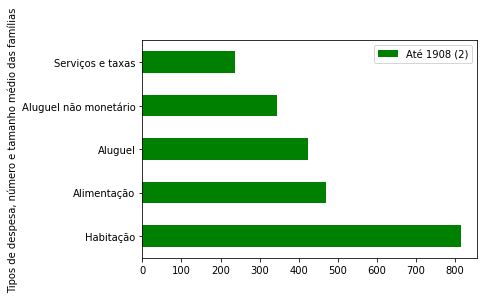

In [43]:
# Gráfico de barras dos dados listados acima (sem barra de total).

dados_despesas_estado.iloc[lista_top_N_1908[:-1], [0, 2]].plot(kind='barh', x=colunas_df[0], y=colunas_df[2], color="green")

In [44]:
# Os mesmos passos serão repetidos para as outras 5 classes do dataframe. 

In [45]:
produtos_classe_2862 = dados_despesas_estado.drop(linhas_familia_e_total_por_classes).iloc[:, [3]].apply(lambda item: item/soma_gastos[3])
produtos_classe_2862.sort_values(by=colunas_df[3], ascending=False, inplace=True)

In [46]:
lista_top_N_2862 = list(produtos_classe_2862.index[0:qtd_top_itens]) + list(dados_despesas_estado.index[-1:])
dados_despesas_estado.iloc[lista_top_N_2862, [0, 3]]

,"Tipos de despesa, número e tamanho médio das famílias",Mais de 1908 a 2862
1,Habitação,1148.45
0,Alimentação,682.91
2,Aluguel,581.47
26,Transporte,530.95
4,Aluguel não monetário,503.24
92,Total gasto por classes,7618.75


<AxesSubplot:ylabel='Tipos de despesa, número e tamanho médio das famílias'>

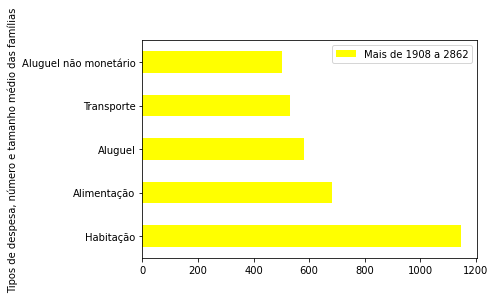

In [47]:
dados_despesas_estado.iloc[lista_top_N_2862[:-1], [0, 3]].plot(kind='barh', x=colunas_df[0], y=colunas_df[3], color="yellow")

In [48]:
produtos_classe_5724 = dados_despesas_estado.drop(linhas_familia_e_total_por_classes).iloc[:, [4]].apply(lambda item: item/soma_gastos[4])
produtos_classe_5724.sort_values(by=colunas_df[4], ascending=False, inplace=True)

In [49]:
lista_top_N_5724 = list(produtos_classe_5724.index[0:qtd_top_itens]) + list(dados_despesas_estado.index[-1:])
dados_despesas_estado.iloc[lista_top_N_5724, [0, 4]]

,"Tipos de despesa, número e tamanho médio das famílias",Mais de 2862 a 5724
1,Habitação,1658.10
26,Transporte,1089.90
0,Alimentação,965.76
2,Aluguel,799.82
4,Aluguel não monetário,700.82
92,Total gasto por classes,13440.48


<AxesSubplot:ylabel='Tipos de despesa, número e tamanho médio das famílias'>

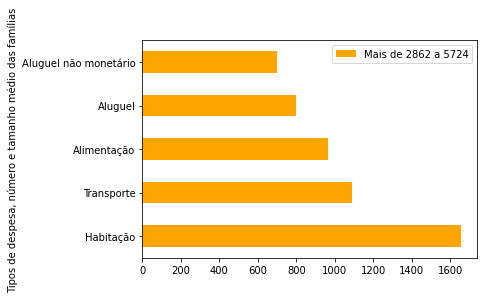

In [50]:
dados_despesas_estado.iloc[lista_top_N_5724[:-1], [0, 4]].plot(kind='barh', x=colunas_df[0], y=colunas_df[4], color="orange")

In [51]:
produtos_classe_9540 = dados_despesas_estado.drop(linhas_familia_e_total_por_classes).iloc[:, [5]].apply(lambda item: item/soma_gastos[5])
produtos_classe_9540.sort_values(by=colunas_df[5], ascending=False, inplace=True)

In [52]:
lista_top_N_9540 = list(produtos_classe_9540.index[0:qtd_top_itens]) + list(dados_despesas_estado.index[-1:])
dados_despesas_estado.iloc[lista_top_N_9540, [0, 5]]

,"Tipos de despesa, número e tamanho médio das famílias",Mais de 5724 a 9540
1,Habitação,2278.54
26,Transporte,1811.58
76,Outras despesas correntes,1252.66
0,Alimentação,1183.04
2,Aluguel,1098.35
92,Total gasto por classes,19663.04


<AxesSubplot:ylabel='Tipos de despesa, número e tamanho médio das famílias'>

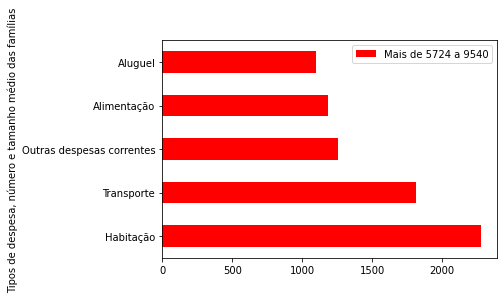

In [53]:
dados_despesas_estado.iloc[lista_top_N_9540[:-1], [0, 5]].plot(kind='barh', x=colunas_df[0], y=colunas_df[5], color="red")

In [54]:
produtos_classe_14310 = dados_despesas_estado.drop(linhas_familia_e_total_por_classes).iloc[:, [6]].apply(lambda item: item/soma_gastos[6])
produtos_classe_14310.sort_values(by=colunas_df[6], ascending=False, inplace=True)

In [55]:
lista_top_N_14310 = list(produtos_classe_14310.index[0:qtd_top_itens]) + list(dados_despesas_estado.index[-1:])
dados_despesas_estado.iloc[lista_top_N_14310, [0, 6]]

,"Tipos de despesa, número e tamanho médio das famílias",Mais de 9540 a 14310
1,Habitação,3102.18
26,Transporte,2537.54
76,Outras despesas correntes,2510.44
0,Alimentação,1511.11
2,Aluguel,1430.00
92,Total gasto por classes,29365.22


<AxesSubplot:ylabel='Tipos de despesa, número e tamanho médio das famílias'>

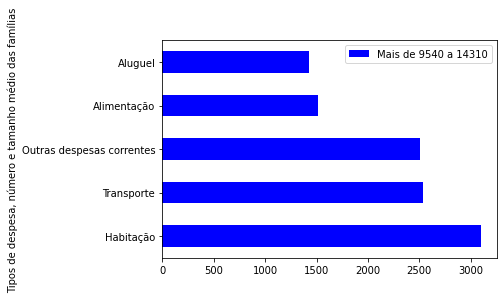

In [56]:
dados_despesas_estado.iloc[lista_top_N_14310[:-1], [0, 6]].plot(kind='barh', x=colunas_df[0], y=colunas_df[6], color="blue")

In [57]:
produtos_classe_23850 = dados_despesas_estado.drop(linhas_familia_e_total_por_classes).iloc[:, [7]].apply(lambda item: item/soma_gastos[7])
produtos_classe_23850.sort_values(by=colunas_df[7], ascending=False, inplace=True)

In [58]:
lista_top_N_23850 = list(produtos_classe_23850.index[0:qtd_top_itens]) + list(dados_despesas_estado.index[-1:])
dados_despesas_estado.iloc[lista_top_N_23850, [0, 7]]

,"Tipos de despesa, número e tamanho médio das famílias",Mais de 14310 a 23850
76,Outras despesas correntes,4806.89
1,Habitação,4744.36
26,Transporte,3792.67
83,Aumento do ativo,2472.91
0,Alimentação,2111.32
92,Total gasto por classes,48634.53


<AxesSubplot:ylabel='Tipos de despesa, número e tamanho médio das famílias'>

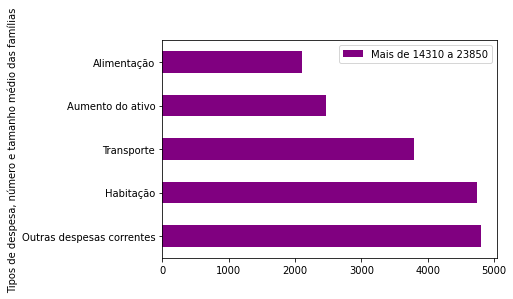

In [59]:
dados_despesas_estado.iloc[lista_top_N_23850[:-1], [0, 7]].plot(kind='barh', x=colunas_df[0], y=colunas_df[7], color="purple")

In [60]:
# Ver relações entre classes sociais e padrões de consumo (Parte 2 - Despesas com alimentação).

In [61]:
dados_alimentacao_estado

,"Tipos de despesa, número e tamanho médio das famílias",Despesa monetária e não monetária média mensal familiar (R$),Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Despesas com alimentação,688.51,470.26,682.91,965.76,1183.04,1511.11,2111.32
1,Alimentação no domicílio,421.18,310.48,432.82,562.13,664.21,784.44,1013.62
2,"Cereais, leguminosas e oleaginosas",22.81,20.50,23.90,22.86,22.67,33.65,30.67
3,Arroz,14.25,13.31,15.60,13.85,12.66,14.22,12.00
4,Feijão,5.56,5.60,5.81,5.13,5.31,3.99,6.16
...,...,...,...,...,...,...,...,...
81,"Cervejas, chopes e outras bebidas alcoólicas",8.98,6.21,9.63,15.13,14.46,9.64,16.72
82,Alimentação light e diet,0.09,0.05,0.09,0.15,0.00,-1.00,0.51
83,Outras,47.94,48.33,51.90,67.03,38.61,47.58,35.43
84,Número de famílias,7149295.00,1478894.00,2470800.00,1092145.00,384637.00,207088.00,123662.00


In [62]:
# Este dataset possui apenas uma linha com "despesas", que não sabemos quais são os critérios para o cálculo.

dados_alimentacao_estado = dados_alimentacao_estado.drop([0]).reset_index(drop=True)

In [63]:
dados_alimentacao_estado

,"Tipos de despesa, número e tamanho médio das famílias",Despesa monetária e não monetária média mensal familiar (R$),Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Alimentação no domicílio,421.18,310.48,432.82,562.13,664.21,784.44,1013.62
1,"Cereais, leguminosas e oleaginosas",22.81,20.50,23.90,22.86,22.67,33.65,30.67
2,Arroz,14.25,13.31,15.60,13.85,12.66,14.22,12.00
3,Feijão,5.56,5.60,5.81,5.13,5.31,3.99,6.16
4,Orgânicos,0.01,0.01,-1.00,-1.00,0.07,-1.00,-1.00
...,...,...,...,...,...,...,...,...
80,"Cervejas, chopes e outras bebidas alcoólicas",8.98,6.21,9.63,15.13,14.46,9.64,16.72
81,Alimentação light e diet,0.09,0.05,0.09,0.15,0.00,-1.00,0.51
82,Outras,47.94,48.33,51.90,67.03,38.61,47.58,35.43
83,Número de famílias,7149295.00,1478894.00,2470800.00,1092145.00,384637.00,207088.00,123662.00


In [64]:
# A seguir serão replicados os mesmos passos feitos no primeiro dataset.

In [65]:
linhas_familia_alimentacao = list(dados_alimentacao_estado.index[-2:])

In [66]:
soma_1908_alimentacao = dados_alimentacao_estado.drop(linhas_familia_alimentacao)[colunas_df[2]]
soma_1908_alimentacao = soma_1908_alimentacao[soma_1908_alimentacao >= 0].sum()

soma_2862_alimentacao = dados_alimentacao_estado.drop(linhas_familia_alimentacao)[colunas_df[3]]
soma_2862_alimentacao = soma_2862_alimentacao[soma_2862_alimentacao >= 0].sum()

soma_5724_alimentacao = dados_alimentacao_estado.drop(linhas_familia_alimentacao)[colunas_df[4]]
soma_5724_alimentacao = soma_5724_alimentacao[soma_5724_alimentacao >= 0].sum()

soma_9540_alimentacao = dados_alimentacao_estado.drop(linhas_familia_alimentacao)[colunas_df[5]]
soma_9540_alimentacao = soma_9540_alimentacao[soma_9540_alimentacao >= 0].sum()

soma_14310_alimentacao = dados_alimentacao_estado.drop(linhas_familia_alimentacao)[colunas_df[6]]
soma_14310_alimentacao = soma_14310_alimentacao[soma_14310_alimentacao >= 0].sum()

soma_23850_alimentacao = dados_alimentacao_estado.drop(linhas_familia_alimentacao)[colunas_df[7]]
soma_23850_alimentacao = soma_23850_alimentacao[soma_23850_alimentacao >= 0].sum()

In [67]:
soma_gastos_alimentacao = ["Total gasto por classes", 0]
soma_gastos_alimentacao.append(soma_1908_alimentacao)
soma_gastos_alimentacao.append(soma_2862_alimentacao)
soma_gastos_alimentacao.append(soma_5724_alimentacao)
soma_gastos_alimentacao.append(soma_9540_alimentacao)
soma_gastos_alimentacao.append(soma_14310_alimentacao)
soma_gastos_alimentacao.append(soma_23850_alimentacao)

In [68]:
soma_gastos_alimentacao[1] = np.mean(soma_gastos_alimentacao[2:])

In [69]:
nova_linha_alimentacao = pd.DataFrame([soma_gastos_alimentacao], columns=colunas_df, index=[linhas_familia_alimentacao[-1]+1])

dados_alimentacao_estado = pd.concat([dados_alimentacao_estado, nova_linha_alimentacao])

In [70]:
dados_alimentacao_estado

,"Tipos de despesa, número e tamanho médio das famílias",Despesa monetária e não monetária média mensal familiar (R$),Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Alimentação no domicílio,421.18,310.48,432.82,562.13,664.21,784.44,1013.62
1,"Cereais, leguminosas e oleaginosas",22.81,20.50,23.90,22.86,22.67,33.65,30.67
2,Arroz,14.25,13.31,15.60,13.85,12.66,14.22,12.00
3,Feijão,5.56,5.60,5.81,5.13,5.31,3.99,6.16
4,Orgânicos,0.01,0.01,-1.00,-1.00,0.07,-1.00,-1.00
...,...,...,...,...,...,...,...,...
81,Alimentação light e diet,0.09,0.05,0.09,0.15,0.00,-1.00,0.51
82,Outras,47.94,48.33,51.90,67.03,38.61,47.58,35.43
83,Número de famílias,7149295.00,1478894.00,2470800.00,1092145.00,384637.00,207088.00,123662.00
84,Tamanho médio da família,2.93,2.69,3.13,3.48,3.11,2.93,3.02


In [71]:
qtd_top_itens_alimentacao = 5

In [72]:
linhas_familia_e_total_por_classes_alimentacao = list(dados_alimentacao_estado.index[-3:])

In [73]:
produtos_classe_1908_alimentacao = dados_alimentacao_estado.drop(linhas_familia_e_total_por_classes_alimentacao).iloc[:, [2]].apply(lambda item: item/soma_gastos_alimentacao[2])
produtos_classe_1908_alimentacao.sort_values(by=colunas_df[2], ascending=False, inplace=True)

In [74]:
lista_top_N_1908_alimentacao = list(produtos_classe_1908_alimentacao.index[0:qtd_top_itens_alimentacao]) + list(dados_alimentacao_estado.index[-1:])
dados_alimentacao_estado.iloc[lista_top_N_1908_alimentacao, [0, 2]]

,"Tipos de despesa, número e tamanho médio das famílias",Até 1908 (2)
0,Alimentação no domicílio,310.48
74,Alimentação fora do domicílio,159.78
75,Almoço e jantar,75.04
31,"Carnes, vísceras e pescados",56.02
82,Outras,48.33
85,Total gasto por classes,1213.81


<AxesSubplot:ylabel='Tipos de despesa, número e tamanho médio das famílias'>

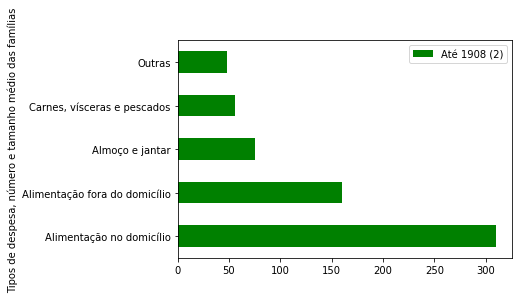

In [75]:
dados_alimentacao_estado.iloc[lista_top_N_1908_alimentacao[:-1], [0, 2]].plot(kind='barh', x=colunas_df[0], y=colunas_df[2], color="green")

In [76]:
produtos_classe_2862_alimentacao = dados_alimentacao_estado.drop(linhas_familia_e_total_por_classes_alimentacao).iloc[:, [3]].apply(lambda item: item/soma_gastos_alimentacao[3])
produtos_classe_2862_alimentacao.sort_values(by=colunas_df[3], ascending=False, inplace=True)

In [77]:
lista_top_N_2862_alimentacao = list(produtos_classe_2862_alimentacao.index[0:qtd_top_itens_alimentacao]) + list(dados_alimentacao_estado.index[-1:])
dados_alimentacao_estado.iloc[lista_top_N_2862_alimentacao, [0, 3]]

,"Tipos de despesa, número e tamanho médio das famílias",Mais de 1908 a 2862
0,Alimentação no domicílio,432.82
74,Alimentação fora do domicílio,250.09
75,Almoço e jantar,134.49
31,"Carnes, vísceras e pescados",81.59
50,Panificados,59.49
85,Total gasto por classes,1756.74


<AxesSubplot:ylabel='Tipos de despesa, número e tamanho médio das famílias'>

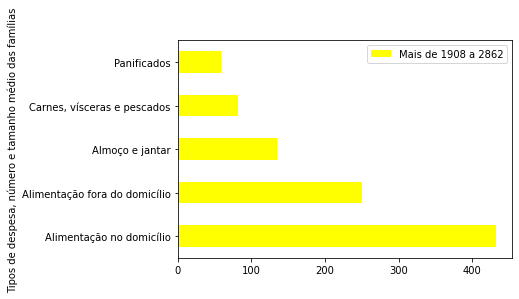

In [78]:
dados_alimentacao_estado.iloc[lista_top_N_2862_alimentacao[:-1], [0, 3]].plot(kind='barh', x=colunas_df[0], y=colunas_df[3], color="yellow")

In [79]:
produtos_classe_5724_alimentacao = dados_alimentacao_estado.drop(linhas_familia_e_total_por_classes_alimentacao).iloc[:, [4]].apply(lambda item: item/soma_gastos_alimentacao[4])
produtos_classe_5724_alimentacao.sort_values(by=colunas_df[4], ascending=False, inplace=True)

In [80]:
lista_top_N_5724_alimentacao = list(produtos_classe_5724_alimentacao.index[0:qtd_top_itens_alimentacao]) + list(dados_alimentacao_estado.index[-1:])
dados_alimentacao_estado.iloc[lista_top_N_5724_alimentacao, [0, 4]]

,"Tipos de despesa, número e tamanho médio das famílias",Mais de 2862 a 5724
0,Alimentação no domicílio,562.13
74,Alimentação fora do domicílio,403.63
75,Almoço e jantar,238.83
31,"Carnes, vísceras e pescados",115.87
50,Panificados,73.08
85,Total gasto por classes,2422.97


<AxesSubplot:ylabel='Tipos de despesa, número e tamanho médio das famílias'>

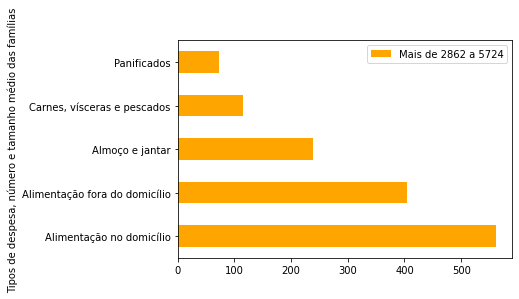

In [81]:
dados_alimentacao_estado.iloc[lista_top_N_5724_alimentacao[:-1], [0, 4]].plot(kind='barh', x=colunas_df[0], y=colunas_df[4], color="orange")

In [82]:
produtos_classe_9540_alimentacao = dados_alimentacao_estado.drop(linhas_familia_e_total_por_classes_alimentacao).iloc[:, [5]].apply(lambda item: item/soma_gastos_alimentacao[5])
produtos_classe_9540_alimentacao.sort_values(by=colunas_df[5], ascending=False, inplace=True)

In [83]:
lista_top_N_9540_alimentacao = list(produtos_classe_9540_alimentacao.index[0:qtd_top_itens_alimentacao]) + list(dados_alimentacao_estado.index[-1:])
dados_alimentacao_estado.iloc[lista_top_N_9540_alimentacao, [0, 5]]

,"Tipos de despesa, número e tamanho médio das famílias",Mais de 5724 a 9540
0,Alimentação no domicílio,664.21
74,Alimentação fora do domicílio,518.82
75,Almoço e jantar,361.74
31,"Carnes, vísceras e pescados",121.03
59,Bebidas e infusões,86.69
85,Total gasto por classes,2943.34


<AxesSubplot:ylabel='Tipos de despesa, número e tamanho médio das famílias'>

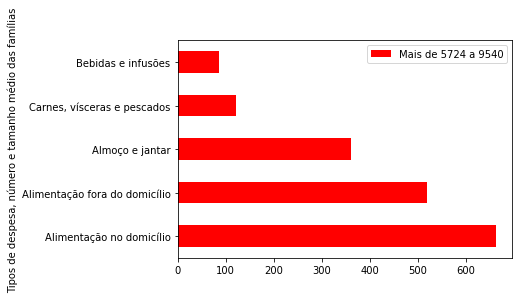

In [84]:
dados_alimentacao_estado.iloc[lista_top_N_9540_alimentacao[:-1], [0, 5]].plot(kind='barh', x=colunas_df[0], y=colunas_df[5], color="red")

In [85]:
produtos_classe_14310_alimentacao = dados_alimentacao_estado.drop(linhas_familia_e_total_por_classes_alimentacao).iloc[:, [6]].apply(lambda item: item/soma_gastos_alimentacao[6])
produtos_classe_14310_alimentacao.sort_values(by=colunas_df[6], ascending=False, inplace=True)

In [86]:
lista_top_N_14310_alimentacao = list(produtos_classe_14310_alimentacao.index[0:qtd_top_itens_alimentacao]) + list(dados_alimentacao_estado.index[-1:])
dados_alimentacao_estado.iloc[lista_top_N_14310_alimentacao, [0, 6]]

,"Tipos de despesa, número e tamanho médio das famílias",Mais de 9540 a 14310
0,Alimentação no domicílio,784.44
74,Alimentação fora do domicílio,726.67
75,Almoço e jantar,554.93
31,"Carnes, vísceras e pescados",119.50
43,Leites e derivados,106.06
85,Total gasto por classes,3699.75


<AxesSubplot:ylabel='Tipos de despesa, número e tamanho médio das famílias'>

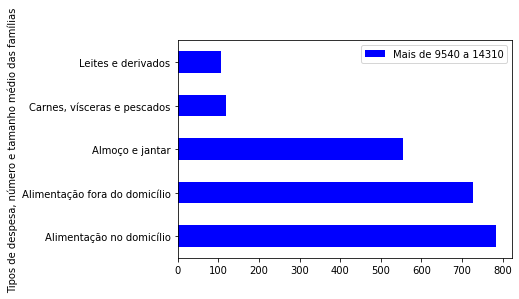

In [87]:
dados_alimentacao_estado.iloc[lista_top_N_14310_alimentacao[:-1], [0, 6]].plot(kind='barh', x=colunas_df[0], y=colunas_df[6], color="blue")

In [88]:
produtos_classe_23850_alimentacao = dados_alimentacao_estado.drop(linhas_familia_e_total_por_classes_alimentacao).iloc[:, [7]].apply(lambda item: item/soma_gastos_alimentacao[7])
produtos_classe_23850_alimentacao.sort_values(by=colunas_df[7], ascending=False, inplace=True)

In [89]:
lista_top_N_23850_alimentacao = list(produtos_classe_23850_alimentacao.index[0:qtd_top_itens_alimentacao]) + list(dados_alimentacao_estado.index[-1:])
dados_alimentacao_estado.iloc[lista_top_N_23850_alimentacao, [0, 7]]

,"Tipos de despesa, número e tamanho médio das famílias",Mais de 14310 a 23850
74,Alimentação fora do domicílio,1097.70
0,Alimentação no domicílio,1013.62
75,Almoço e jantar,885.32
31,"Carnes, vísceras e pescados",182.46
59,Bebidas e infusões,123.02
85,Total gasto por classes,5071.83


<AxesSubplot:ylabel='Tipos de despesa, número e tamanho médio das famílias'>

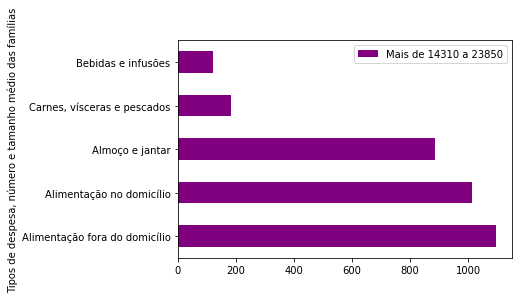

In [90]:
dados_alimentacao_estado.iloc[lista_top_N_23850_alimentacao[:-1], [0, 7]].plot(kind='barh', x=colunas_df[0], y=colunas_df[7], color="purple")

In [91]:
# Gráficos juntos

<AxesSubplot:ylabel='Tipos de despesa, número e tamanho médio das famílias'>

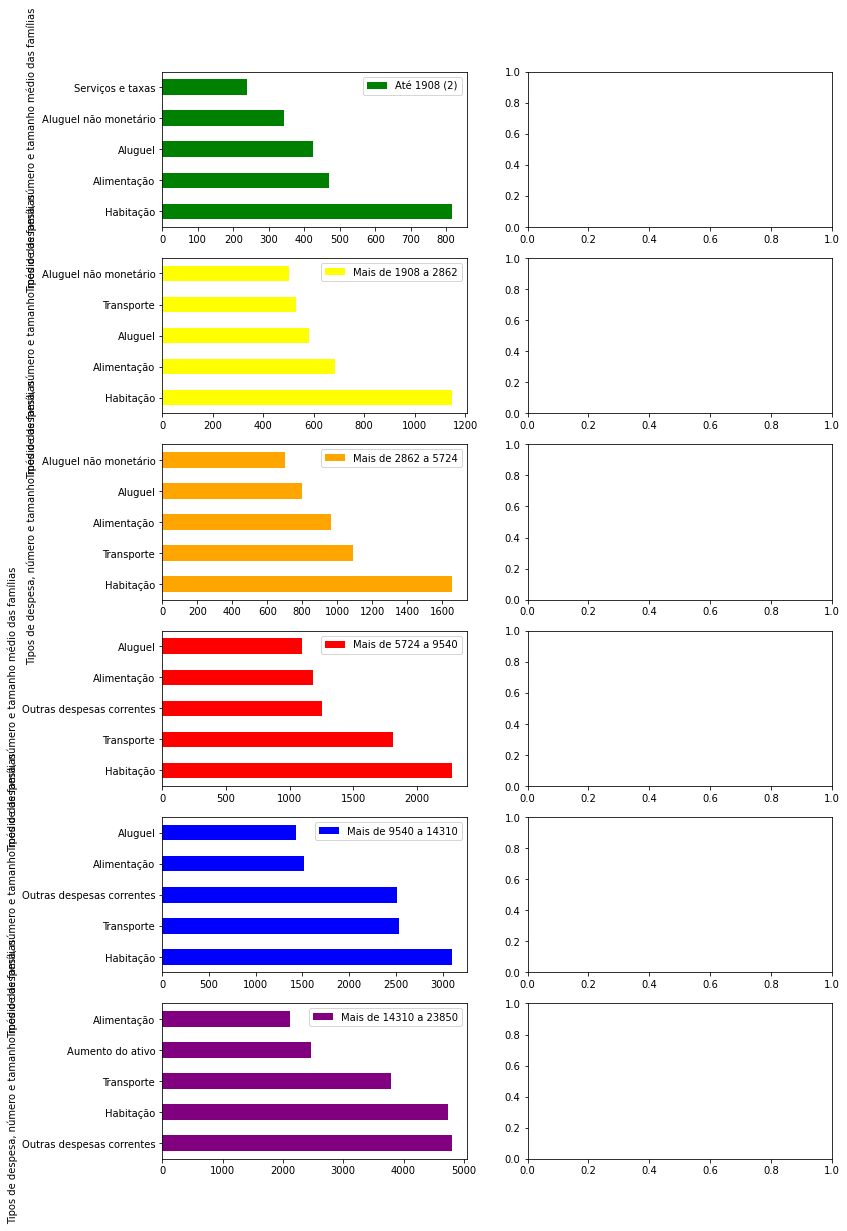

In [92]:
fig, axes = plt.subplots(nrows=6, ncols=2)

# plt.figure(figsize=[20, 16])
# df1.plot(ax=axes[0,0])
# df2.plot(ax=axes[0,1])

dados_despesas_estado.iloc[lista_top_N_1908[:-1], [0, 2]].plot(kind='barh', x=colunas_df[0], y=colunas_df[2], ax=axes[0,0], figsize=(12,20), ylabel="", color="green")

dados_despesas_estado.iloc[lista_top_N_2862[:-1], [0, 3]].plot(kind='barh', x=colunas_df[0], y=colunas_df[3], ax=axes[1,0], figsize=(12,20), ylabel="", color="yellow")

dados_despesas_estado.iloc[lista_top_N_5724[:-1], [0, 4]].plot(kind='barh', x=colunas_df[0], y=colunas_df[4], ax=axes[2,0], figsize=(12,20), ylabel="", color="orange")

dados_despesas_estado.iloc[lista_top_N_9540[:-1], [0, 5]].plot(kind='barh', x=colunas_df[0], y=colunas_df[5], ax=axes[3,0], figsize=(12,20), ylabel="", color="red")

dados_despesas_estado.iloc[lista_top_N_14310[:-1], [0, 6]].plot(kind='barh', x=colunas_df[0], y=colunas_df[6], ax=axes[4,0], figsize=(12,20), ylabel="", color="blue")

dados_despesas_estado.iloc[lista_top_N_23850[:-1], [0, 7]].plot(kind='barh', x=colunas_df[0], y=colunas_df[7], ax=axes[5,0], figsize=(12,20), ylabel="", color="purple")

# plt.xlabel("oi")
# plt.axis.set_visible(True)
# ax1 = plt.axes()
# ax1.xaxis.set_label_text('foo')
# ax1.xaxis.label.set_visible(False)
# plt.ylabel = "oi"

<AxesSubplot:ylabel='Tipos de despesa, número e tamanho médio das famílias'>

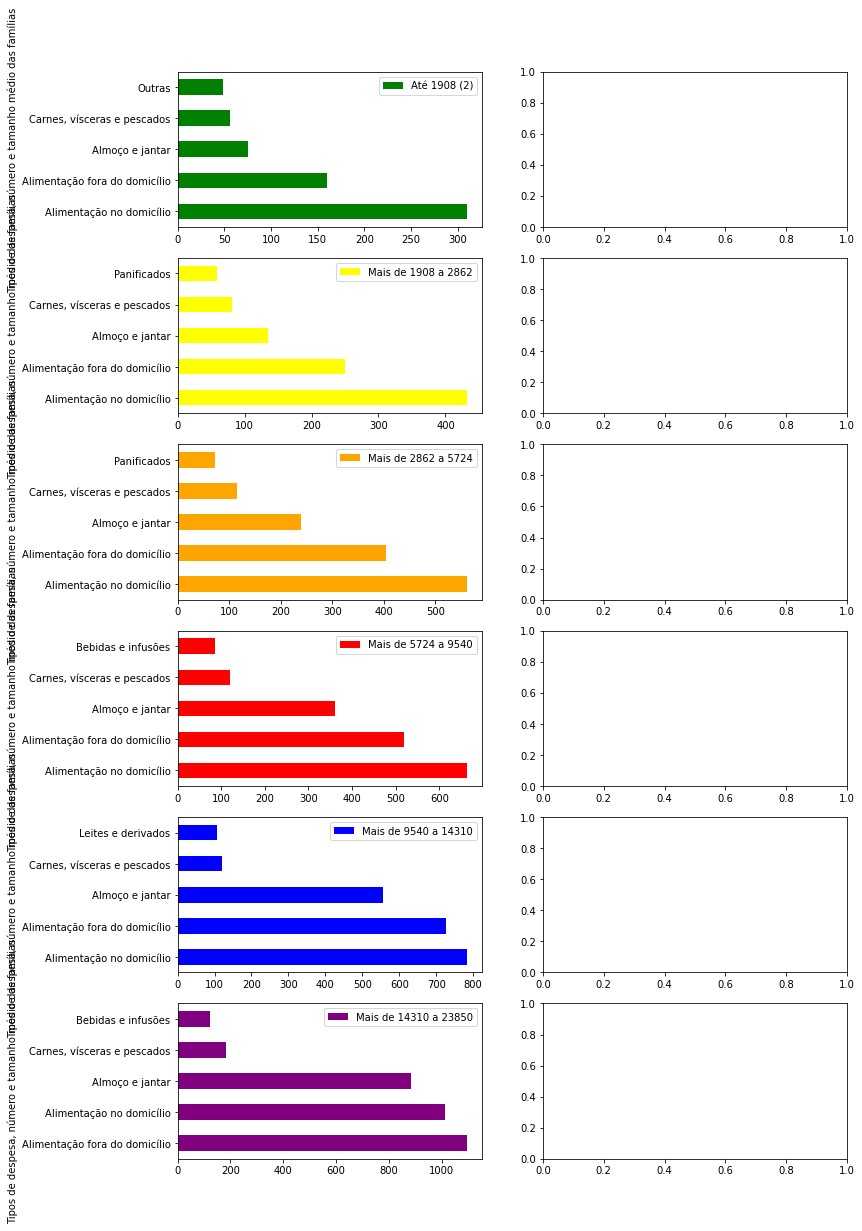

In [93]:
fig, axes = plt.subplots(nrows=6, ncols=2)

# plt.figure(figsize=[20, 16])
# df1.plot(ax=axes[0,0])
# df2.plot(ax=axes[0,1])

dados_alimentacao_estado.iloc[lista_top_N_1908_alimentacao[:-1], [0, 2]].plot(kind='barh', x=colunas_df[0], y=colunas_df[2], ax=axes[0,0], figsize=(12,20), ylabel="", color="green")

dados_alimentacao_estado.iloc[lista_top_N_2862_alimentacao[:-1], [0, 3]].plot(kind='barh', x=colunas_df[0], y=colunas_df[3], ax=axes[1,0], figsize=(12,20), ylabel="", color="yellow")

dados_alimentacao_estado.iloc[lista_top_N_5724_alimentacao[:-1], [0, 4]].plot(kind='barh', x=colunas_df[0], y=colunas_df[4], ax=axes[2,0], figsize=(12,20), ylabel="", color="orange")

dados_alimentacao_estado.iloc[lista_top_N_9540_alimentacao[:-1], [0, 5]].plot(kind='barh', x=colunas_df[0], y=colunas_df[5], ax=axes[3,0], figsize=(12,20), ylabel="", color="red")

dados_alimentacao_estado.iloc[lista_top_N_14310_alimentacao[:-1], [0, 6]].plot(kind='barh', x=colunas_df[0], y=colunas_df[6], ax=axes[4,0], figsize=(12,20), ylabel="", color="blue")

dados_alimentacao_estado.iloc[lista_top_N_23850_alimentacao[:-1], [0, 7]].plot(kind='barh', x=colunas_df[0], y=colunas_df[7], ax=axes[5,0], figsize=(12,20), ylabel="", color="purple")

# plt.xlabel("oi")
# plt.axis.set_visible(True)
# ax1 = plt.axes()
# ax1.xaxis.set_label_text('foo')
# ax1.xaxis.label.set_visible(False)
# plt.ylabel = "oi"